## Imports

In [0]:
import numpy as np
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Preprocessing



### Load dataset

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Data normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = np.reshape(X_train,[60000,28,28,1])
X_test = np.reshape(X_test,[10000,28,28,1])
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Learning

### Building MLP



In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=[28,28,1], ))
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, padding='valid', activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='tanh'))
model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### Train

In [0]:
history = model.fit(X_train, y_train, batch_size=100, validation_split=0.1, epochs=5)

Epoch 1/5
540/540 [==============================] - 3s 6ms/step - loss: 0.5966 - sparse_categorical_accuracy: 0.7825 - val_loss: 0.4529 - val_sparse_categorical_accuracy: 0.8350
Epoch 2/5
540/540 [==============================] - 3s 6ms/step - loss: 0.4114 - sparse_categorical_accuracy: 0.8518 - val_loss: 0.3908 - val_sparse_categorical_accuracy: 0.8585
Epoch 3/5
540/540 [==============================] - 3s 6ms/step - loss: 0.3642 - sparse_categorical_accuracy: 0.8658 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.8637
Epoch 4/5
540/540 [==============================] - 3s 6ms/step - loss: 0.3357 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.3469 - val_sparse_categorical_accuracy: 0.8722
Epoch 5/5
540/540 [==============================] - 3s 6ms/step - loss: 0.3150 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.3437 - val_sparse_categorical_accuracy: 0.8747


### Evaluation

In [0]:
test_loss, test_accuracy = model.evaluate(X_train, y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.3644 - sparse_categorical_accuracy: 0.8696


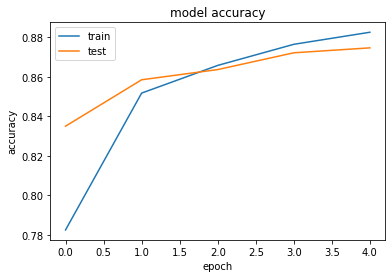

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()